This sample file is an example of a background/signal classification and to find the number of DATA points the algorithm classifies as background and signal. The background is Standard Model and the signal is Zprime in this example. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np

Loading all the data, background and signal samples

In [3]:
bkg1 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_1.h5")
bkg2 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_2.h5")
bkg3 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_3.h5")
bkg4 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_4.h5")
bkg5 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_5.h5")
bkg6 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_6.h5")
bkg7 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_7.h5")
bkg8 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_8.h5")
bkg9 = pd.read_hdf("/home/michael/Desktop/OpenData/SM_Backgrounds/SM_Backgrounds_2L_pt25_25_met50_num_9.h5")

sig = pd.read_hdf("/home/michael/Desktop/OpenData/BSM_Signal_Samples/BSM_Signal_Samples/BSM_Signal_Samples_2L_pt25_25_met50_num_1.h5")

data = pd.read_hdf("/home/michael/Desktop/OpenData/data/data_2L_pt25_25_met50_num_1.h5")

frames_bkg = [bkg1,bkg2,bkg3,bkg4,bkg5,bkg6,bkg7,bkg8,bkg9]
bkg = pd.concat(frames_bkg)
frames_merged = [bkg,sig]
merged_train = pd.concat(frames_merged)

In [4]:
data.shape

(453694, 18)

Choosing the variables to be input in the ML algorithm. Note the beauty of pandas: the variable names are entered, compared to numpy arrays which don't have this feature.

In [5]:
X_train = merged_train[['met_et','mll','met_phi']]
Y_train = merged_train['isSignal']
X_test = data[['met_et','mll','met_phi']]

At this point, you have to choose the ML algorithm (BDT, logistic regression, ...). The different cells correspond to different algorithms. You can add more advanced (classification) algorithms. It is not advised run two or more algorithms successively. If you made the wrong choice of algorithm, restart the whole kernel.

[13:35:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


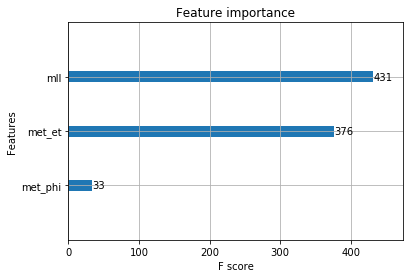

In [6]:
# BDT classifier
xgbclassifier = xgb.XGBClassifier(
    max_depth=3, 
    n_estimators=120,
    learning_rate=0.1,
    n_jobs=4,
    #scale_pos_weight=sum_wbkg/sum_wsig,
    objective='binary:logistic')
    #missing=-999.0) 
xgbclassifier.fit(X_train, Y_train) 
# Plot variable importance
fig_size = plt.rcParams["figure.figsize"] 
xgb.plot_importance(xgbclassifier)
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.show()
y_pred = xgbclassifier.predict(X_test)
y_pred_prob = xgbclassifier.predict_proba(X_test)

In [ ]:
# LOGREG classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

In [ ]:
y_pred.shape

In [7]:
Y_pred_sig = []
Y_pred_bkg = []
j = 0
for i in y_pred:
    if i == 0:
        Y_pred_bkg.append((y_pred[j]))
    else:
        Y_pred_sig.append((y_pred[j]))
    j += 1

In [8]:
print("Number of data points classified as signal =",len(Y_pred_sig))
print("Number of data points classified as background =",len(Y_pred_bkg))

Number of data points classified as signal = 8
Number of data points classified as background = 453686
